In [1]:
#import the necessary packages

import string
import time
import matplotlib.pyplot as plt

In [2]:
#Read the File (AFINN-111.txt) into a dictionary data structure.

afinn_dict = {}
file = open("afinn-111.txt","r")

for line in file:
    data = line.split("\t")
    afinn_dict[data[0]] = data[1].strip()
    
file.close()
# print(afinn_dict)

In [3]:
#import the tweets, read the sentiment scores of each tweet

tweets = open("tweets.txt")       #import the file

for line in tweets:
    tweet = line.translate(str.maketrans('\n',' ', string.punctuation)).lower() #remove punctuation and make lowercase
    word = tweet.split(" ") #separate the words on the spaces
    score = 0
    for i in range(0,len(word)):     #for each tweet
        w = str(word[i].strip())     #strip out the word
        if w in afinn_dict:          #if the word is in the dictionary
#             print(w)                        #print the words that contribute to the score in each tweet
            score += int(afinn_dict[w])       #add the dictionary score value to the running score
    print(str(line)+"| SCORE: "+str(score)+"\n")   #print the tweet and the score
        
tweets.close()

just setting up my twttr
| SCORE: 0

there's a plane in the Hudson. I'm on the ferry going to pick up the people. Crazy.
| SCORE: -2

Are you ready to celebrate? Well, get ready: We have ICE!!!!! Yes, ICE, *WATER ICE* on Mars! woot!!! Best day ever!!
| SCORE: 7

Arrested
| SCORE: -3

HI TWITTERS . THANK YOU FOR A WARM WELCOME. FEELING REALLY 21ST CENTURY .
| SCORE: 6

Hello Twitterverse! We r now LIVE tweeting from the International Space Station -- the 1st live tweet from Space! :) More soon, send your ?s
| SCORE: 0

OK, What The Hell Is "Weird Twitter"?
| SCORE: -6

Please retweet this to spread awareness for retweets.
| SCORE: 1

If only Bradley's arm was longer. Best photo ever. #oscars
| SCORE: 3

admiring my award winning masterpiece -- super stunning roflcopter tweet ftw woohoo!| SCORE: 31



# CREATING THE STRATEGY FUNCTIONS

In [4]:
#create dictionarylookup function
def dictlookup(filename):
    
    #open the file
    file = open(str(filename))
    
    #initialize variables
    num_words = 0
    score = 0
    
    #start the timer
    tstart = time.time()
    
    #iterate through the file
    for line in file:
        for word in line.split():
            word = word.translate(str.maketrans('','', string.punctuation)).lower()
            num_words += 1
            if word in afinn_dict:
                score += int(afinn_dict[word])
    
    #stop the timer and calculate elapsed time
    tstop = time.time()
    elapsed_time = tstop - tstart
    
    #calculate normalized score
    norm_score = score/num_words
    
    #print outputs
    print("The number of words is: "+str(num_words)+".\nThe normalized score is: "+str(norm_score)+".")
    print("The runtime is: "+ str(elapsed_time) + " seconds." )
    
    #close file
    file.close()

In [5]:
#create a linearsearch function

def linearsearch(filename):
    
    #open the file
    file = open(str(filename))

    #create the lists
    word_keys = list(afinn_dict.keys())
    score_values = list(afinn_dict.values())
    
    #initialize variables
    score = 0
    num_words = 0
    
    #start the timer
    tstart = time.time()
    
    #iterate through the file
    for line in file:
        for word in line.split():
            word = word.translate(str.maketrans('','', string.punctuation)).lower()
            num_words += 1
            for j in range(len(word_keys)):
                if word_keys[j] == word:
                    score += int(score_values[j])

    #stop the timer and calculate elapsed time
    tstop = time.time()
    elapsed_time = tstop - tstart
    
    #calculate normalized score
    norm_score = score/num_words
    
    #print outputs
    print("The number of words is: "+str(num_words)+".\nThe normalized score is: "+str(norm_score)+".")
    print("The runtime is: "+ str(elapsed_time) + " seconds." )
    file.close()

In [6]:
#import binary search function from A2 and edit it as necessary: 

def b_search(list,key,left_index,right_index):
    if len(list[left_index:right_index]) == 1:
        return -1     #edit made
    
    midpoint = round((left_index + right_index) / 2)
    
    if key == list[midpoint]:
        return midpoint
    
    elif key < list[midpoint]:
        right_index = midpoint
        return b_search(list,key,left_index,right_index)
    
    elif key > list[midpoint]:
        left_index = midpoint
        return b_search(list,key,left_index,right_index)
    

In [7]:
#create the binarysearch function

def binarysearch(filename):
    
    #open the file
    file = open(str(filename))

    #create the lists
    word_keys = list(afinn_dict.keys())
    score_values = list(afinn_dict.values()) 

    #initialize variables
    score = 0
    num_words = 0
    
    #start the timer
    tstart = time.time()

    #iterate throught he file
    for line in file:
        for word in line.split():
            word = word.translate(str.maketrans('','', string.punctuation)).lower()
            
#             if word in word_keys:      #testing the words contributing to the score and that the output is the index
#                 print(word)
#                 index = b_search(word_keys,str(word),0, len(word_keys))
#                 print(index, score_values[index])
            
            num_words += 1
            index = b_search(word_keys,str(word),0, len(word_keys))
            if index >= 0:
                score += int(score_values[index])
    #stop the timer and calculate elapsed time
    tstop = time.time()
    elapsed_time = tstop - tstart
    
    #calculate normalized score
    norm_score = score/num_words

    #print outputs
    print("The number of words is: "+str(num_words)+".\nThe normalized score is: "+str(norm_score)+".")
    print("The runtime is: "+ str(elapsed_time) + " seconds." )
    
    #close the file
    file.close()

# TESTING THE STRATEGIES

In [8]:
#Compare the methods on different tomes:
#TOME 1 - ALICE IN WONDERLAND:

print("Alice in Wonderland Tests")
print("\nDictionary Lookup: ")
dictlookup("alice.txt")
print("\nLinear Search: ")
linearsearch("alice.txt") 
print("\nBinary Search: ")
binarysearch("alice.txt")

Alice in Wonderland Tests

Dictionary Lookup: 
The number of words is: 12763.
The normalized score is: 0.0036041682989892657.
The runtime is: 0.015991926193237305 seconds.

Linear Search: 
The number of words is: 12763.
The normalized score is: 0.0036041682989892657.
The runtime is: 0.8866040706634521 seconds.

Binary Search: 
The number of words is: 12763.
The normalized score is: 0.0036041682989892657.
The runtime is: 0.17938899993896484 seconds.


In [9]:
#Compare the methods on different tomes:
#TOME 2 - SHAKESPEARE:

print("Shakespeare Tests")
print("\nDictionary Lookup: ")
dictlookup("shakespeare.txt")
print("\nLinear Search: ")
linearsearch("shakespeare.txt")    #this took my computer a minute... literally
print("\nBinary Search: ")
binarysearch("shakespeare.txt")


Shakespeare Tests

Dictionary Lookup: 
The number of words is: 904061.
The normalized score is: 0.013945961610997488.
The runtime is: 0.9430820941925049 seconds.

Linear Search: 
The number of words is: 904061.
The normalized score is: 0.013945961610997488.
The runtime is: 61.401630878448486 seconds.

Binary Search: 
The number of words is: 904061.
The normalized score is: 0.013954810571410558.
The runtime is: 12.430593013763428 seconds.


In [11]:
#Compare the methods on different tomes:
#TOME 3 - LES MISERABLES:

print("Les Miserables Tests")
print("\nDictionary Lookup: ")
dictlookup("les-miserables.txt")
print("\nLinear Search: ")
linearsearch("les-miserables.txt") 
print("\nBinary Search: ")
binarysearch("les-miserables.txt")

Les Miserables Tests

Dictionary Lookup: 
The number of words is: 568531.
The normalized score is: -0.002736878024241422.
The runtime is: 0.6038050651550293 seconds.

Linear Search: 
The number of words is: 568531.
The normalized score is: -0.002736878024241422.
The runtime is: 39.95845985412598 seconds.

Binary Search: 
The number of words is: 568531.
The normalized score is: -0.0026946639673122484.
The runtime is: 8.203712940216064 seconds.


In [12]:
#Compare the methods on different tomes:
#TOME 4 - ODYSSEY:

print("Odyssey Tests")
print("\nDictionary Lookup: ")
dictlookup("odyssey.txt")
print("\nLinear Search: ")
linearsearch("odyssey.txt")
print("\nBinary Search: ")
binarysearch("odyssey.txt")

Odyssey Tests

Dictionary Lookup: 
The number of words is: 123600.
The normalized score is: 0.015970873786407765.
The runtime is: 0.13231682777404785 seconds.

Linear Search: 
The number of words is: 123600.
The normalized score is: 0.015970873786407765.
The runtime is: 8.851015090942383 seconds.

Binary Search: 
The number of words is: 123600.
The normalized score is: 0.015970873786407765.
The runtime is: 1.7753469944000244 seconds.


# WRAP UP:

#### Report the Normalized Sentiment Scores:

Alice in Wonderland:
0.0036

Shakespeare:
0.0139

Les Miserables:
-0.0027

Odyssey:
0.0159

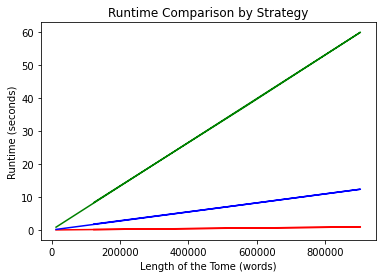

In [13]:
#Plotting the Comparisons

#The runtimes may be subject to change 
#These values are based on my last run of the code
#The order is Alice, Shakespeare, Les Miserables, and Odyssey

#SAMPLE DATA
tome_length = [12763, 904061, 568531, 123600]
dictionary_runtimes=[0.019954919815063477,0.9094736576080322,0.5952470302581787,0.1266031265258789]
linear_runtimes=[0.8522942066192627,59.83646106719971,37.46525001525879,8.32260513305664]
binary_runtimes=[0.17502117156982422,12.332908868789673, 7.763751983642578, 1.7814619541168213]

x = tome_length
y1 = dictionary_runtimes
y2 = linear_runtimes
y3 = binary_runtimes

plt.plot(x,y1, color="red", label = "dictionary_runtimes")
plt.plot(x,y2, color = "green", label = "linear_runtimes" )
plt.plot(x,y3, color = "blue", label = "binary runtimes")

plt.xlabel("Length of the Tome (words)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison by Strategy")
plt.show()

#### Interpret your results:

It's clear that the runtime of the dictionary lookup is the fastest. I did not think that the linear runtimes would be so bad but I am glad that we are learning data structures that can improve the runtime of our code. The sentiment scores seem pretty accurate because Les Miserables is one sad book. haha. Dictionaries are the way to go!